<a href="https://colab.research.google.com/github/PratibhaPachare/TASK-5/blob/main/TASK5_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment - 3 

The data is available as two attached CSV files:
takehome_user_engagement. csv
takehome_users . csv

The data has the following two tables:

1] A user table ( "takehome_users" ) with data on 12,000 users who signed up for the
product in the last two years. This table includes:
● name: the user's name

● object_id: the user's id

● email: email address

● creation_source: how their account was created. This takes on one
of 5 values:

○ PERSONAL_PROJECTS: invited to join another user's personal workspace

○ GUEST_INVITE: invited to an organization as a guest
(limited permissions)

○ ORG_INVITE: invited to an organization (as a full member)

○ SIGNUP: signed up via the website

○ SIGNUP_GOOGLE_AUTH: signed up using Google Authentication (using a Google email account for their login
id)

● creation_time: when they created their account

● last_session_creation_time: unix timestamp of last login

● opted_in_to_mailing_list: whether they have opted into receiving marketing emails

● enabled_for_marketing_drip: whether they are on the regular marketing email drip

● org_id: the organization (group of users) they belong to

● invited_by_user_id: which user invited them to join (if applicable).

2] A usage summary table ("takehome_user_engagement") that has a row for each day that a user logged into the product.

Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven­day period , identify which factors predict future user adoption .

In [358]:
# Import modules
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from scipy import stats

In [359]:
# Loading the dataset takehome_user_engagement & takehome_users
takehome_user_engagement=pd.read_csv("/content/drive/MyDrive/CSV FILES/TASK5/takehome_user_engagement.csv")
takehome_users=pd.read_csv("/content/drive/MyDrive/CSV FILES/TASK5/takehome_users.csv",encoding="latin-1")

In [360]:
# First five rows in df_tue DataFrame (takehome_user_engagement.csv)
takehome_user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [361]:
# First five rows in df_tu DataFrame (takehome_users.csv)
takehome_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [362]:
takehome_user_engagement.shape

(207917, 3)

In [363]:
takehome_users.shape

(12000, 10)

In [364]:
takehome_user_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [365]:
takehome_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [366]:
takehome_user_engagement.isnull().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

There are no missing values in takehome_user_engagement dataframe.

time_stamp will have to be converted into datetime objects.

In [367]:
takehome_users.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

There are missing values in last_session_creation_time &invited_by_user_id. 

The columns creation_time, last_session_creation_time will have to be converted into datetime objects.

In [368]:
#convert creation_time,last_session_time and time_stamp into DateTime objects.
takehome_users["creation_time"] = pd.to_datetime(takehome_users['creation_time'])
takehome_user_engagement["time_stamp"] = pd.to_datetime(takehome_user_engagement["time_stamp"])
# converting unix timestamp into datetime object
takehome_users["last_session_creation_time"] = pd.to_datetime(takehome_users['last_session_creation_time'], unit="s")

In [369]:
# Information of the takehome_users DataFrame.
takehome_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [370]:
# Information of the takehome_user_engagement DataFrame.
takehome_user_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


The columns creation_time, last_session_creation_time and time_stamp have been converted into datetime objects.

In [371]:
# The count of each value in "visited" column of takehome_user_engagement df.
takehome_user_engagement["visited"].value_counts()

1    207917
Name: visited, dtype: int64

As all the values in the "visited" column is 1(same value), we will remove this column from our dataframe as it is not relevant for our analysis.



In [372]:
# Dropping the 'visited' column from takehome_user_engagement dataframe
takehome_user_engagement.drop(['visited'],axis=1,inplace=True)
takehome_user_engagement.head(3)

,time_stamp,user_id
0,2014-04-22 03:53:30,1
1,2013-11-15 03:45:04,2
2,2013-11-29 03:45:04,2


In [373]:
takehome_users.head(3)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0


In [374]:
# Checking data correctness by verifying last_session_creation_time is after creation_time
takehome_users[takehome_users["creation_time"] > takehome_users["last_session_creation_time"]]


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id


In [375]:
takehome_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [376]:
# Removing rows with incorrect data
takehome_user = takehome_users[~(takehome_users["creation_time"] > takehome_users["last_session_creation_time"])]
print("Number of Rows at Present:",takehome_user.shape[0])

Number of Rows at Present: 12000


In [377]:
# invited_by_user_id column will be NaN if the user has signed up directly, without any invitation.
takehome_users[takehome_user["invited_by_user_id"].isnull()]["creation_source"].value_counts()

PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [378]:
print(takehome_user[(takehome_user["creation_source"]=='PERSONAL_PROJECTS') & 
                    (takehome_user["invited_by_user_id"].notnull())].shape[0])

print(takehome_user[(takehome_user["creation_source"]=='SIGNUP') & 
                    (takehome_user["invited_by_user_id"].notnull())].shape[0])

print(takehome_user[(takehome_user["creation_source"]=='SIGNUP_GOOGLE_AUTH') & 
                    (takehome_user["invited_by_user_id"].notnull())].shape[0])

0
0
0


In [379]:
# Filling the missing values in invited_by_user_id by 0
takehome_users.invited_by_user_id.fillna(0,inplace=True)
# Number of missing values in invited_by_user_id column
takehome_users["invited_by_user_id"].isnull().sum()

0

In [380]:
# Renaming the "object_id" column with new column name "user_id" in takehome_users dataframe.
takehome_users.rename(columns={"object_id":"user_id"}, inplace = True)
takehome_users.columns

Index(['user_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id'],
      dtype='object')

In [381]:
# Dropping unnecessary columns which are not needed for the analysis.
takehome_users.drop(['name', 'email'], axis=1, inplace=True)
takehome_users.columns


Index(['user_id', 'creation_time', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id'],
      dtype='object')

In [382]:
# First 6 rows
takehome_users.head(6)


,user_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0
5,6,2013-12-17 03:37:06,GUEST_INVITE,2013-12-19 03:37:06,0,0,197,11241.0


In [383]:
# Getting the user-ids with missing values in last_session_creation_time
userid_lastsession_nan = takehome_users[takehome_users["last_session_creation_time"].isnull()]["user_id"]
# Checking the login dates for userids in takehome_user_engagement dataframe
# with missing last_session_creation_time in takehome_users dataframe
takehome_user_engagement[takehome_user_engagement["user_id"].isin(userid_lastsession_nan)]

,time_stamp,user_id


There are no login details available in takehome_user_engagement dataframe for the users who have missing last_session_creation_time. So we will fill all missing entries in last_session_creation_time column with dates specified in creation_time column of takehome_users dataframe, assuming that is the only time they logged into the product.

In [384]:
# Treating the missing values in 'last_session_creation_time' column
takehome_users["last_session_creation_time"].fillna(takehome_users["creation_time"],inplace=True)
takehome_users.isnull().sum()

user_id                       0
creation_time                 0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
dtype: int64

In [385]:
left_df = takehome_users[['user_id','org_id','invited_by_user_id']]
right_df = takehome_users[['user_id','org_id']]
left_df.head()

,user_id,org_id,invited_by_user_id
0,1,11,10803.0
1,2,1,316.0
2,3,94,1525.0
3,4,1,5151.0
4,5,193,5240.0


In [386]:
right_df.head()

,user_id,org_id
0,1,11
1,2,1
2,3,94
3,4,1
4,5,193


In [387]:
df = pd.merge(left_df, right_df, how = 'left', left_on = 'invited_by_user_id', right_on = 'user_id')
df.head()

,user_id_x,org_id_x,invited_by_user_id,user_id_y,org_id_y
0,1,11,10803.0,10803.0,11.0
1,2,1,316.0,316.0,1.0
2,3,94,1525.0,1525.0,94.0
3,4,1,5151.0,5151.0,1.0
4,5,193,5240.0,5240.0,193.0


In [388]:
df[(df.org_id_x!=df.org_id_y) & (df.invited_by_user_id!=0)]

,user_id_x,org_id_x,invited_by_user_id,user_id_y,org_id_y


Above empty dataframe indicates that the users and their reference belong to the same group.

An "adopted user" is a user who has logged into the product on three separate days in at least one seven-day period. We will add a column for adopted user with boolean values - True for adopted user, False otherwise.

In [389]:
# org_size = Number of users in each organization
# Adding org_size column
temp = takehome_users.org_id.value_counts()
takehome_users['org_size'] = [temp[i] for i in takehome_users['org_id']]
# referred = if the user was invited to sign in then True else False
# Adding referred
takehome_users['referred'] = takehome_users['invited_by_user_id'] != 0
takehome_users.head()

,user_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,org_size,referred
0,1,2014-04-22 03:53:30,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,75,True
1,2,2013-11-15 03:45:04,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,233,True
2,3,2013-03-19 23:14:52,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,32,True
3,4,2013-05-21 08:09:28,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,233,True
4,5,2013-01-17 10:14:20,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,16,True


In [390]:
# User-defined function called get_count()
def get_count(grp, w):
    return grp.rolling(w, on='time_stamp')['user_id'].count()
#time_stamp must be monotonic for applying rolling()
takehome_user_engagement.sort_values(by=["time_stamp"], inplace=True) 

# adding a column '7_day_visit' into takehome_user_engagement dataframe.
takehome_user_engagement['7_day_visit']=takehome_user_engagement.groupby('user_id', 
                                 as_index=False, 
                                 group_keys=False).apply(get_count, '7D')

takehome_user_engagement.head()

,time_stamp,user_id,7_day_visit
178140,2012-05-31 08:20:06,10012,1.0
59486,2012-05-31 15:47:36,3428,1.0
175638,2012-05-31 17:19:37,9899,1.0
26821,2012-05-31 21:58:33,1693,1.0
109716,2012-06-01 00:17:30,6102,1.0


In [391]:
# Creating a data frame with adopted_user status against the user_id
df_ad = takehome_user_engagement.groupby('user_id')['7_day_visit'].max().to_frame().reset_index()
df_ad['adopted_user'] = df_ad['7_day_visit']>=3
df_ad.head()

,user_id,7_day_visit,adopted_user
0,1,1.0,False
1,2,3.0,True
2,3,1.0,False
3,4,1.0,False
4,5,1.0,False


In [392]:
# Merging 2 dataframes
df = pd.merge( takehome_users,df_ad,how='outer',on='user_id').drop(['7_day_visit'],axis=1)
df.head()

,user_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,org_size,referred,adopted_user
0,1,2014-04-22 03:53:30,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,75,True,False
1,2,2013-11-15 03:45:04,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,233,True,True
2,3,2013-03-19 23:14:52,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,32,True,False
3,4,2013-05-21 08:09:28,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,233,True,False
4,5,2013-01-17 10:14:20,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,16,True,False


In [393]:
# Getting the information of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   creation_source             12000 non-null  object        
 3   last_session_creation_time  12000 non-null  datetime64[ns]
 4   opted_in_to_mailing_list    12000 non-null  int64         
 5   enabled_for_marketing_drip  12000 non-null  int64         
 6   org_id                      12000 non-null  int64         
 7   invited_by_user_id          12000 non-null  float64       
 8   org_size                    12000 non-null  int64         
 9   referred                    12000 non-null  bool          
 10  adopted_user                8823 non-null   object        
dtypes: bool(1), datetime64[ns](2), float64(1), int64(5), o

We can see some missing values in 'adopted_user' column. It has NaN values only for the cases where user did not login. For such cases, we will fill NaN with False.

In [394]:
# Replacing missing values in adopted_user column with False
df.adopted_user.fillna(False,inplace=True)
# checking for missing values in adopted_user column. 
df.adopted_user.isnull().sum()

0

In [395]:
# Adding one more column for checking if the reference user is adopted
df = pd.merge(df,df[['user_id','adopted_user']], how='left',left_on='invited_by_user_id',right_on='user_id')
df.head()

,user_id_x,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,org_size,referred,adopted_user_x,user_id_y,adopted_user_y
0,1,2014-04-22 03:53:30,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,75,True,False,10803.0,False
1,2,2013-11-15 03:45:04,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,233,True,True,316.0,False
2,3,2013-03-19 23:14:52,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,32,True,False,1525.0,True
3,4,2013-05-21 08:09:28,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,233,True,False,5151.0,True
4,5,2013-01-17 10:14:20,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,16,True,False,5240.0,True


In [396]:
df.drop(columns='user_id_y',inplace=True)
df.rename(columns={'user_id_x':'user_id','adopted_user_x':'adopted_user','adopted_user_y':'adopted_ref'},inplace=True)
df.adopted_ref.fillna(False,inplace=True)
df.head()

,user_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,org_size,referred,adopted_user,adopted_ref
0,1,2014-04-22 03:53:30,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,75,True,False,False
1,2,2013-11-15 03:45:04,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,233,True,True,False
2,3,2013-03-19 23:14:52,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,32,True,False,True
3,4,2013-05-21 08:09:28,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,233,True,False,True
4,5,2013-01-17 10:14:20,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,16,True,False,True


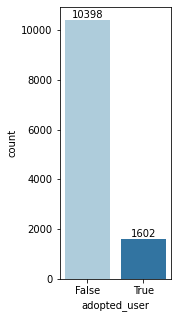

In [397]:
# count plot w.r.t target column('adopted_user' column)
plt.figure(figsize=(2,5))
cp = sns.countplot(x='adopted_user', data=df, palette="Paired")
for p in cp.patches:
  cp.annotate(str(p.get_height()), xy=(p.get_x() + p.get_width() / 2, p.get_height()),
              ha='center', va='bottom')
plt.show()


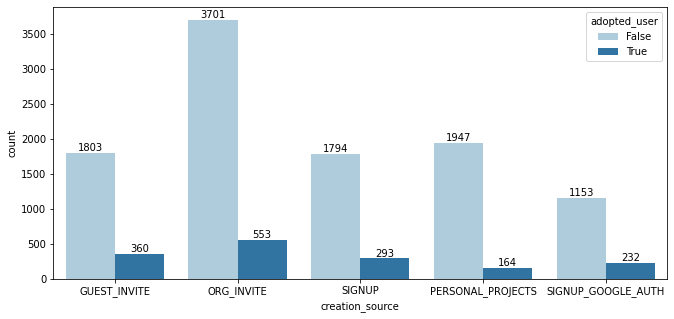

In [398]:
# count plot w.r.t 'creation_source' column
plt.figure(figsize=(11,5))
cp = sns.countplot(x="creation_source",hue='adopted_user', data=df, palette="Paired")
for p in cp.patches:
  cp.annotate(str(p.get_height()), xy=(p.get_x() + p.get_width() / 2, p.get_height()),
              ha='center', va='bottom')
plt.xticks(rotation=0)
plt.show()


In [399]:
def login(df_1):
    x = df_1.creation_time.to_frame()
    x.index = x.creation_time
    return x.resample("M").count()

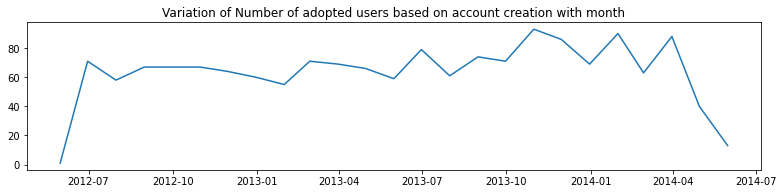

In [400]:
adopted_mc = login(df[df.adopted_user==True])
fig = plt.figure(figsize=(11, 5))
plt.subplot(2,1,1)
plt.plot(adopted_mc)
plt.title('Variation of Number of adopted users based on account creation with month')
plt.tight_layout()


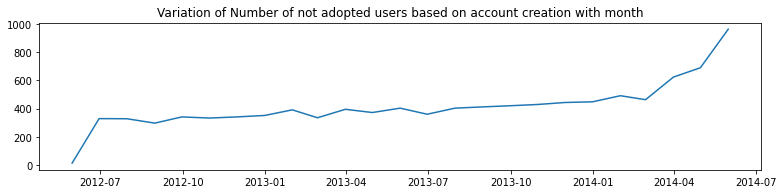

In [401]:
nt_adopted_mc = login(df[df.adopted_user==False])
fig = plt.figure(figsize=(11, 5))
plt.subplot(2,1,2)
plt.plot(nt_adopted_mc)
plt.title('Variation of Number of not adopted users based on account creation with month')
plt.tight_layout()


In [402]:
df.drop(['user_id','creation_time','last_session_creation_time'],axis=1,inplace=True)
df.columns

Index(['creation_source', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'org_size', 'referred', 'adopted_user', 'adopted_ref'],
      dtype='object')

In [403]:
#converts categorical data,"creation_source" into dummy or indicator variables.
df_new = pd.get_dummies(df)
df_new.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,org_size,referred,adopted_user,adopted_ref,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,11,10803.0,75,True,False,False,1,0,0,0,0
1,0,0,1,316.0,233,True,True,False,0,1,0,0,0
2,0,0,94,1525.0,32,True,False,True,0,1,0,0,0
3,0,0,1,5151.0,233,True,False,True,1,0,0,0,0
4,0,0,193,5240.0,16,True,False,True,1,0,0,0,0


In [404]:
# Getting the information of the dataframe.
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   opted_in_to_mailing_list            12000 non-null  int64  
 1   enabled_for_marketing_drip          12000 non-null  int64  
 2   org_id                              12000 non-null  int64  
 3   invited_by_user_id                  12000 non-null  float64
 4   org_size                            12000 non-null  int64  
 5   referred                            12000 non-null  bool   
 6   adopted_user                        12000 non-null  bool   
 7   adopted_ref                         12000 non-null  bool   
 8   creation_source_GUEST_INVITE        12000 non-null  uint8  
 9   creation_source_ORG_INVITE          12000 non-null  uint8  
 10  creation_source_PERSONAL_PROJECTS   12000 non-null  uint8  
 11  creation_source_SIGNUP              12000

In [405]:
# Extracting Feature and Target Variables.
X = df_new.loc[:,df_new.columns != "adopted_user"] #feature variables
y = df_new['adopted_user'] #Target  variable
# Shape of Feature and Target variable
print(X.shape)
print(y.shape)

(12000, 12)
(12000,)


As we have to find the features that predict user adoption, and not predict user adoption, we will not split our dataset in training and testing sets.

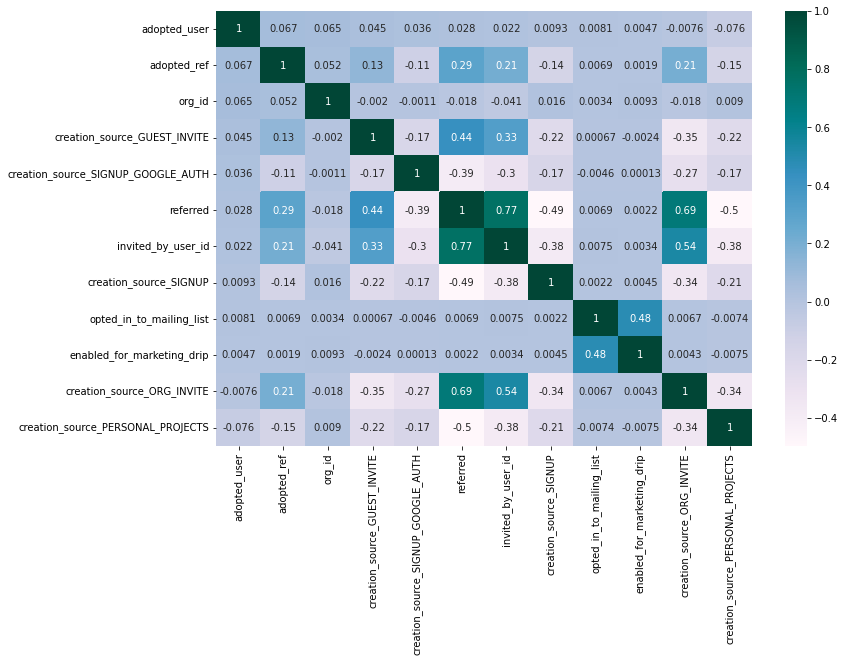

In [415]:
# Heatmap 
k=12 # number of features
cols = df_new.corr().nlargest(k,'adopted_user')['adopted_user'].index
corr_df = df_new[cols].corr()
plt.figure(figsize=(12,8))
#plot heat map
sns.heatmap(corr_df,annot=True,cmap="PuBuGn")
plt.show()

In [407]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Applying SelectKBest class to score the 12 features
feature_select = SelectKBest(score_func=chi2, k=12).fit(X,y)
feature_select_df = pd.DataFrame({"Feature":list(X.columns),
                                  "Scores":feature_select.scores_})
print(feature_select_df.nlargest(12,'Scores'))

                               Feature        Scores
3                   invited_by_user_id  26272.387638
4                             org_size   6142.446090
2                               org_id   5418.462606
9    creation_source_PERSONAL_PROJECTS     56.844560
6                          adopted_ref     49.064999
7         creation_source_GUEST_INVITE     20.283149
11  creation_source_SIGNUP_GOOGLE_AUTH     13.848040
5                             referred      4.274697
10              creation_source_SIGNUP      0.857191
0             opted_in_to_mailing_list      0.590515
8           creation_source_ORG_INVITE      0.451700
1           enabled_for_marketing_drip      0.220970


[0.01997871 0.01614227 0.39021264 0.28586167 0.26023923 0.00090139
 0.01003816 0.00307197 0.00289801 0.00736535 0.00122554 0.00206505]


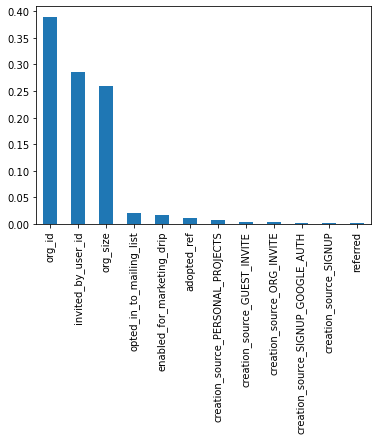

In [408]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
# Plotting graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='bar')
plt.show()

In [409]:
#calculating p-value matrix for multiple variables with the target

df1= pd.DataFrame(columns=["r","p"])

for col in df_new:
  if pd.api.types.is_numeric_dtype(df_new[col]):
    r,p = stats.pearsonr(df_new['adopted_user'],df_new[col])
    df1.loc[col] = [round(r,3), round(p,6)]
df1

,r,p
opted_in_to_mailing_list,0.008,0.375103
enabled_for_marketing_drip,0.005,0.610320
org_id,0.065,0.000000
invited_by_user_id,0.022,0.017991
org_size,-0.083,0.000000
referred,0.028,0.002434
adopted_user,1.000,0.000000
adopted_ref,0.067,0.000000
creation_source_GUEST_INVITE,0.045,0.000001
creation_source_ORG_INVITE,-0.008,0.402904


From the above heatmap, bar graph and the p-values, the important features seem to be org_id, org_size, invited_by_user_id, referred, adopted_reference, creation_source_PERSONAL_PROJECTS.

